In [1]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
game = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Top%20Video%20Games%201995-2021%20Metacritic/all_games.csv")

In [3]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18800 entries, 0 to 18799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          18800 non-null  object
 1   platform      18800 non-null  object
 2   release_date  18800 non-null  object
 3   summary       18686 non-null  object
 4   meta_score    18800 non-null  int64 
 5   user_review   18800 non-null  object
dtypes: int64(1), object(5)
memory usage: 881.4+ KB


In [4]:
game.head()

,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9


In [5]:
game.drop(columns = ['summary'] , inplace=True)
game["user_review"] = pd.to_numeric(game["user_review"],errors='coerce')
game['platform'] = game.platform.astype('category')
game['name'] = game.name.astype(str)
game['release_date']= pd.to_datetime(game['release_date'])
game['Year'] = game['release_date'].dt.year
game = game.drop(columns = 'release_date')
game.head()

,name,platform,meta_score,user_review,Year
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,99,9.1,1998
1,Tony Hawk's Pro Skater 2,PlayStation,98,7.4,2000
2,Grand Theft Auto IV,PlayStation 3,98,7.7,2008
3,SoulCalibur,Dreamcast,98,8.4,1999
4,Grand Theft Auto IV,Xbox 360,98,7.9,2008


In [6]:
game['user_review'].unique()

array([9.1, 7.4, 7.7, 8.4, 7.9, 8. , 8.3, 6.2, 8.7, 7.5, 8.8, 8.5, 8.6,
       8.9, 8.2, 9.2, 7.8, 9. , 9.3, 8.1, 6.8, 7.6, 6.9, 6.6, 7.3, 7.2,
       9.4, 5.7, 6. , 5.8, 7.1, 3.3, 5. , 5.5, 6.5, 5.9, 6.7, 3.8, 6.4,
       7. , 6.3, 4.9, nan, 5.3, 3.5, 4.7, 6.1, 4.8, 4.1, 5.6, 4.4, 5.4,
       4.6, 3.1, 5.2, 4.3, 1.8, 4.5, 5.1, 4.2, 4. , 9.7, 3.2, 2.9, 2.1,
       2.4, 3.4, 3. , 3.7, 2.2, 2.6, 2.7, 2.5, 2.8, 3.9, 2. , 9.6, 1.5,
       3.6, 1.4, 1.2, 0.9, 1.9, 1.1, 1.7, 0.8, 1. , 0.6, 2.3, 0.5, 1.6,
       0.2, 0.7, 1.3])

In [7]:
game = game.dropna()

In [8]:
game['platform'].unique()

[' Nintendo 64', ' PlayStation', ' PlayStation 3', ' Dreamcast', ' Xbox 360', ..., ' DS', ' PlayStation Vita', ' PlayStation 5', ' PSP', ' Stadia']
Length: 22
Categories (22, object): [' 3DS', ' DS', ' Dreamcast', ' Game Boy Advance', ..., ' Xbox', ' Xbox 360', ' Xbox One', ' Xbox Series X']

In [9]:
PS_games = game[game['platform'].str.contains(' PlayStation', na=False)]
PS_games = PS_games.drop(game[game['platform'] == ' PlayStation Vita'].index)
PS_games.user_review = PS_games.user_review*10
PS_games.head()

,name,platform,meta_score,user_review,Year
1,Tony Hawk's Pro Skater 2,PlayStation,98,74.0,2000
2,Grand Theft Auto IV,PlayStation 3,98,77.0,2008
9,Grand Theft Auto V,PlayStation 3,97,83.0,2013
14,Tony Hawk's Pro Skater 3,PlayStation 2,97,75.0,2001
16,Red Dead Redemption 2,PlayStation 4,97,85.0,2018


In [10]:
PS_data = {'min' : [np.min(PS_games.meta_score) , np.min(PS_games.user_review)],
        'max' : [np.max(PS_games.meta_score) , np.max(PS_games.user_review)],
        'mean' : [np.mean(PS_games.meta_score) , np.mean(PS_games.user_review)],
        'median' : [np.median(PS_games.meta_score) , np.nanmedian(PS_games.user_review)],
        'std' : [np.std(PS_games.meta_score) , np.std(PS_games.user_review)]}
PS_number_summary = pd.DataFrame(PS_data , index=['Meta Score' , 'User Review'])
print(PS_number_summary)

              min   max       mean  median        std
Meta Score   21.0  98.0  71.036249    73.0  12.241216
User Review   2.0  97.0  69.367966    72.0  14.178714


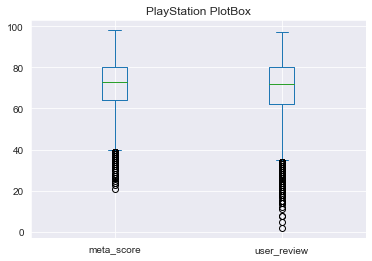

In [11]:
sns.set_style('darkgrid')
PS_games[['meta_score' , 'user_review']].plot.box(title = 'PlayStation PlotBox')
plt.show()

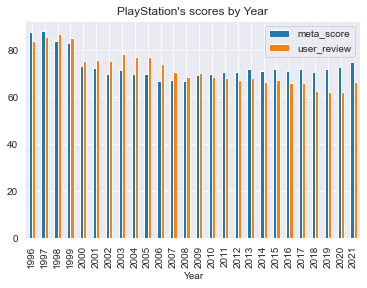

In [12]:
PS_by_year = PS_games.groupby('Year')[['meta_score','user_review']].mean().reset_index()
PS_by_Gen = PS_games.groupby('platform')[['meta_score','user_review']].mean().reset_index()
PS_by_Gen = PS_by_Gen.dropna()
PS_by_year.set_index('Year').plot.bar(title = "PlayStation's scores by Year")
plt.show()

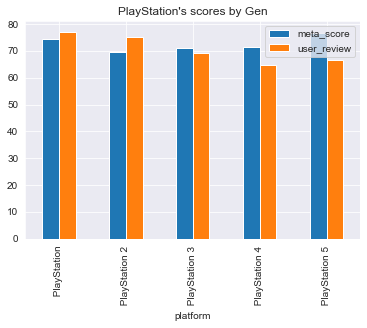

In [13]:
PS_by_Gen.set_index('platform').plot.bar(title = "PlayStation's scores by Gen")
plt.show()

In [14]:
PS_games[['name', 'platform', 'meta_score' , 'Year']].sort_values('meta_score', ascending = False)[:10]

,name,platform,meta_score,Year
1,Tony Hawk's Pro Skater 2,PlayStation,98,2000
2,Grand Theft Auto IV,PlayStation 3,98,2008
9,Grand Theft Auto V,PlayStation 3,97,2013
14,Tony Hawk's Pro Skater 3,PlayStation 2,97,2001
16,Red Dead Redemption 2,PlayStation 4,97,2018
17,Grand Theft Auto V,PlayStation 4,97,2014
19,Grand Theft Auto III,PlayStation 2,97,2001
39,Resident Evil 4,PlayStation 2,96,2005
43,Metal Gear Solid 2: Sons of Liberty,PlayStation 2,96,2001
41,Gran Turismo,PlayStation,96,1998


In [15]:
PS_games[['name', 'platform', 'user_review' , 'Year']].sort_values('user_review', ascending = False)[:10]

,name,platform,user_review,Year
4844,GrimGrimoire,PlayStation 2,97.0,2007
4953,Rochard,PlayStation 3,97.0,2011
12434,Crystar,PlayStation 4,96.0,2019
2407,Astro's Playroom,PlayStation 5,93.0,2020
222,The Witcher 3: Wild Hunt,PlayStation 4,92.0,2015
72,God of War,PlayStation 4,92.0,2018
98,Metal Gear Solid,PlayStation,92.0,1998
3341,Suikoden II,PlayStation,92.0,1999
60,The Last of Us Remastered,PlayStation 4,92.0,2014
780,It Takes Two,PlayStation 5,92.0,2021


In [16]:
XB_games = game[game['platform'].str.contains(' Xbox', na=False)]
XB_games.user_review = XB_games.user_review*10
XB_games.head()

,name,platform,meta_score,user_review,Year
4,Grand Theft Auto IV,Xbox 360,98,79.0,2008
7,Red Dead Redemption 2,Xbox One,97,80.0,2018
8,Grand Theft Auto V,Xbox One,97,79.0,2014
11,Grand Theft Auto V,Xbox 360,97,83.0,2013
21,Halo: Combat Evolved,Xbox,97,87.0,2001


In [17]:
XB_data = {'min' : [np.min(XB_games.meta_score) , np.min(XB_games.user_review)],
        'max' : [np.max(XB_games.meta_score) , np.max(XB_games.user_review)],
        'mean' : [np.mean(XB_games.meta_score) , np.mean(XB_games.user_review)],
        'median' : [np.median(XB_games.meta_score) , np.nanmedian(XB_games.user_review)],
        'std' : [np.std(XB_games.meta_score) , np.std(XB_games.user_review)]}
XB_number_summary = pd.DataFrame(XB_data , index=['Meta Score' , 'User Review'])
print(XB_number_summary)

              min   max       mean  median        std
Meta Score   22.0  98.0  71.020372    73.0  12.906143
User Review   5.0  97.0  68.173310    71.0  13.828287


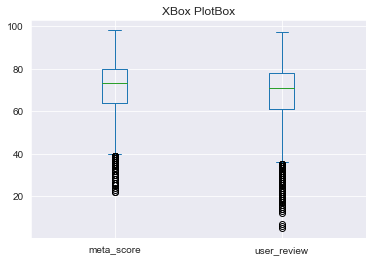

In [18]:
XB_games[['meta_score' , 'user_review']].plot.box(title = "XBox PlotBox")
plt.show()

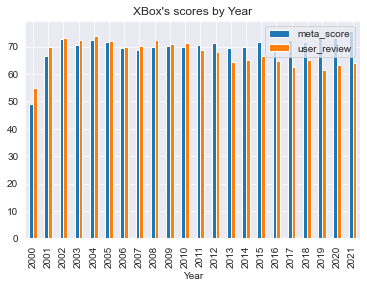

In [19]:
XB_by_year = XB_games.groupby('Year')[['meta_score','user_review']].mean().reset_index()
XB_by_Gen = XB_games.groupby('platform')[['meta_score','user_review']].mean().reset_index()
XB_by_Gen = XB_by_Gen.dropna()
XB_by_year.set_index('Year').plot.bar(title = "XBox's scores by Year")
plt.show()

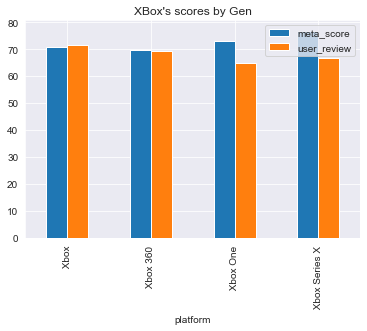

In [20]:
XB_by_Gen.set_index('platform').plot.bar(title = "XBox's scores by Gen")
plt.show()

In [21]:
XB_games[['name', 'platform', 'meta_score' , 'Year']].sort_values('meta_score', ascending = False)[:10]

,name,platform,meta_score,Year
4,Grand Theft Auto IV,Xbox 360,98,2008
8,Grand Theft Auto V,Xbox One,97,2014
11,Grand Theft Auto V,Xbox 360,97,2013
21,Halo: Combat Evolved,Xbox,97,2001
7,Red Dead Redemption 2,Xbox One,97,2018
35,Mass Effect 2,Xbox 360,96,2010
37,The Elder Scrolls V: Skyrim,Xbox 360,96,2011
44,Grand Theft Auto Double Pack,Xbox,96,2003
31,The Orange Box,Xbox 360,96,2007
27,BioShock,Xbox 360,96,2007


In [22]:
XB_games[['name', 'platform', 'user_review' , 'Year']].sort_values('user_review', ascending = False)[:10]

,name,platform,user_review,Year
9550,After Burner Climax,Xbox 360,97.0,2010
4573,Superliminal,Xbox One,96.0,2020
2321,Vanquish,Xbox 360,92.0,2010
295,The Witcher 3: Wild Hunt,Xbox One,92.0,2015
109,Star Wars: Knights of the Old Republic,Xbox,91.0,2003
100,Tom Clancy's Splinter Cell Chaos Theory,Xbox,91.0,2005
31,The Orange Box,Xbox 360,90.0,2007
1111,NFL 2K2,Xbox,90.0,2002
817,DOOM Eternal,Xbox One,90.0,2020
27,BioShock,Xbox 360,90.0,2007


In [23]:
PSvXB = game[game['platform'].isin([' PlayStation 4' , ' PlayStation 5' ,' Xbox One' , ' Xbox Series X'])]

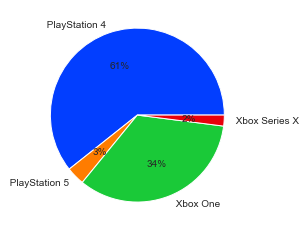

In [24]:
PSvXB_count = PSvXB.groupby('platform').count()
PSvXB_count.drop(PSvXB_count.index[0:11] , inplace=True)
PSvXB_count.drop(PSvXB_count.index[2:9] , inplace=True)
PSvXB_count.drop(['meta_score' , 'user_review' , 'Year'] , axis=1 , inplace=True)
colors = sns.color_palette('bright')[0:5]
plt.pie(PSvXB_count.name, labels = PSvXB_count.index , colors = colors, autopct='%.0f%%' )
plt.show()

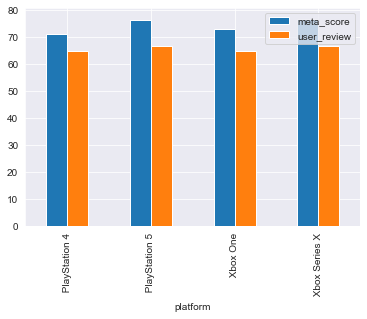

In [25]:
PXdata = PSvXB.groupby('platform')[['meta_score','user_review']].mean().reset_index()
PXdata = PXdata.dropna()
PXdata.user_review = PXdata.user_review*10
PXdata.set_index('platform').plot.bar()
plt.show()

In [26]:
PSvXB[['name', 'platform', 'meta_score']].sort_values('meta_score', ascending = False)[:10]

,name,platform,meta_score
7,Red Dead Redemption 2,Xbox One,97
16,Red Dead Redemption 2,PlayStation 4,97
17,Grand Theft Auto V,PlayStation 4,97
8,Grand Theft Auto V,Xbox One,97
59,Persona 5 Royal,PlayStation 4,95
60,The Last of Us Remastered,PlayStation 4,95
65,Metal Gear Solid V: The Phantom Pain,Xbox One,95
72,God of War,PlayStation 4,94
81,Celeste,Xbox One,94
158,Metal Gear Solid V: The Phantom Pain,PlayStation 4,93


In [27]:
PSvXB[['name', 'platform', 'user_review']].sort_values('user_review', ascending = False)[:10]

,name,platform,user_review
12434,Crystar,PlayStation 4,9.6
4573,Superliminal,Xbox One,9.6
2407,Astro's Playroom,PlayStation 5,9.3
780,It Takes Two,PlayStation 5,9.2
222,The Witcher 3: Wild Hunt,PlayStation 4,9.2
60,The Last of Us Remastered,PlayStation 4,9.2
72,God of War,PlayStation 4,9.2
295,The Witcher 3: Wild Hunt,Xbox One,9.2
1154,Tales of Arise,PlayStation 5,9.1
335,The Witcher 3: Wild Hunt - Blood and Wine,PlayStation 4,9.1
